비지도학습

k평균 알고리즘
  - 유클리드 거리를 통한 유사성 측정

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

In [6]:
filepath = 'https://raw.githubusercontent.com/leekyuyoung202306/PYTHON/main/14%EC%A3%BC%EC%B0%A8/data_clustering.txt'
# 데이터 로드
X = np.loadtxt(filepath, delimiter=',')
X[:3]

array([[2.08, 1.05],
       [2.05, 7.7 ],
       [4.53, 5.49]])

In [7]:
# 클러스터의 수
nnum_cluster = 5

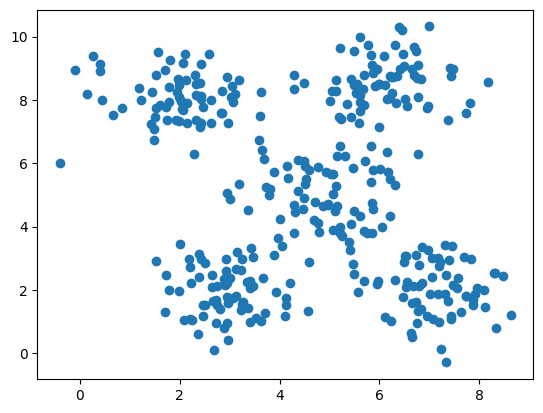

In [8]:
# 데이터 시각화
plt.scatter(X[:,0], X[:,1])
plt.show()

In [9]:
kmeans = KMeans(n_clusters=nnum_cluster)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [12]:
# 경계를 그리기위한포인트 그리드를 정의
x_min,x_max = X[:,0].min() -1, X[:,0].max()+1
y_min,y_max = X[:,1].min() -1, X[:,1].max()+1
x_vals,y_vals =  np.meshgrid(np.arange(x_min,x_max), np.arange(y_min, y_max)  )

In [30]:
# 그리드의 모든 포인트에 대한 출력 레이블 예측
output = kmeans.predict( np.c_[x_vals.ravel(), y_vals.ravel()])
output

array([2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       4, 4, 0, 0, 0, 0, 3, 3, 3, 2, 4, 4, 4, 4, 4, 4, 0, 0, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 4, 0, 3, 3, 3, 3, 3, 3, 4, 4, 1, 1, 1, 1, 3, 3,
       3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1,
       3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [ ]:
# np.c_[x_vals.ravel(), y_vals.ravel()] 를 아래와 같이도 사용가능
# import pandas as pd
# pd.DataFrame(zip(x_vals.ravel(), y_vals.ravel())).to_numpy()

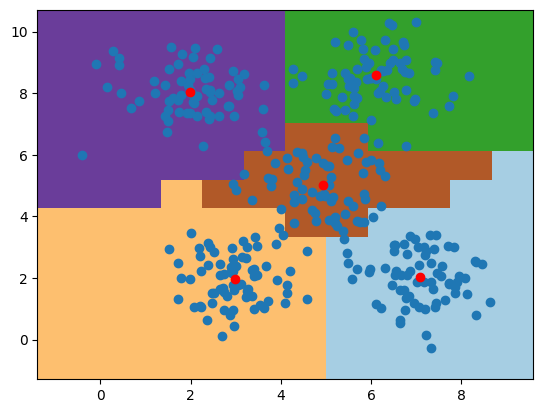

In [35]:
# 서로다른 영역을 그리고 색을 칠한다
output =  output.reshape(x_vals.shape)
plt.imshow(output, interpolation='nearest',extent=(x_vals.min(), x_vals.max(),y_vals.min(),y_vals.max() ),
           cmap=plt.cm.Paired,
           aspect='auto',
           origin='lower'
  )
# 입력 포인트를 overray한다
plt.scatter(X[:,0], X[:,1])

# 클러스터 중심을 그려본다
cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], color='red')

plt.show()